## 1- Data Preprocessing

In [1]:
#===============================================================================
# Import libraries
#===============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#===============================================================================
# Load the dataset
#===============================================================================
print('loading data ...')
df = pd.read_csv('./dataset/CrowdstormingDataJuly1st.csv')
print('data is loaded.')

loading data ...
data is loaded.


### Variables description:
- playerShort: short player ID
- player: player name
- club: player club
- leagueCountry: country of player club (England, Germany, France, and Spain)
- birthday: player birthday
- height: player height (in cm)
- weight: player weight (in kg)
- position: detailed player position
- games: number of games in the player-referee dyad
- victories: victories in the player-referee dyad
- ties: ties in the player-referee dyad
- defeats: losses in the player-referee dyad
- goals: goals scored by a player in the player-referee dyad
- yellowCards: number of yellow cards player received from referee
- yellowReds: number of yellow-red cards player received from referee
- redCards: number of red cards player received from referee
- photoID: ID of player photo (if available)
- rater1: skin rating of photo by rater 1 (5-point scale ranging from “very light skin” to “very dark skin”)
- rater2: skin rating of photo by rater 2 (5-point scale ranging from “very light skin” to “very dark skin”)
- refNum: unique referee ID number (referee name removed for anonymizing purposes)
- refCountry: unique referee country ID number (country name removed for anonymizing purposes)
- meanIAT: mean implicit bias score (using the race IAT) for referee country, higher values correspond to faster white | good, black | bad associations
- nIAT: sample size for race IAT in that particular country
- seIAT: standard error for mean estimate of race IAT
- meanExp: mean explicit bias score (using a racial thermometer task) for referee country, higher values correspond to greater feelings of warmth toward whites versus blacks
- nExp: sample size for explicit bias in that particular country
- seExp: standard error for mean estimate of explicit bias measure

In [3]:
# show the first 10 columns for the first 10 players
df.iloc[:10,:10]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1


In [4]:
# show columns 10 to 21 for the first 10 players
df.iloc[:10,10:22]

,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3
0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC
1,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB
2,1,0,0,1,0,0,NaN,NaN,NaN,3,3,ESP
3,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP
4,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP
5,0,1,0,0,0,0,3868.jpg,0.25,0.00,4,4,LUX
6,0,0,0,0,0,0,47704.jpg,0.00,0.25,4,4,LUX
7,0,1,0,0,0,0,22356.jpg,1.00,1.00,4,4,LUX
8,1,0,0,0,0,0,16528.jpg,0.25,0.25,4,4,LUX
9,0,0,0,0,0,0,36499.jpg,0.00,0.00,4,4,LUX


In [5]:
# show the last 6 columns for the first 10 players
df.iloc[:10,22::]

,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,0.325185,127.0,0.003297,0.538462,130.0,0.013752


In [6]:
# the data desrption
df.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,177.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,641.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,182.000000,76.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1604.000000,21.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2345.000000,44.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


As we can see from the first 10 players and data desription, there are some inconsistencies in data, which are as following:
- 1) Some players' photo are not available. Hence, there is no information on their skin color.
- 2) The race IAT informatios are not availbale for some regions/players.
- 3) For some players, the height/weight informations are not given.
- 4) The two raters disagree about player skintone.
- 5) There are some refs with less than 22 dyads. However, any ref officiated a full game in one of our selected premier leagues should at least 22 dyads (2 teams of 11 players each, more if substitutions occur).

In [7]:
# First of all, we remove all players whose skin color are not available
print('The size of data before any cleaning:', df.shape)
df.dropna(subset=['photoID', 'rater1', 'rater2'], how='any', inplace=True)
print('The size of data after droping all players whose skin color are not available:', df.shape)

The size of data before any cleaning: (146028, 28)
The size of data after droping all players whose skin color are not available: (124621, 28)


So we almost loose 20000 dyads. Now let see the description of the resulting dataframe.

In [8]:
df.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,124575.000000,123868.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124468.000000,1.244680e+05,1.244680e+05,124468.000000,1.244680e+05,124468.000000
mean,182.125330,76.368102,2.993613,1.342663,0.714968,0.935982,0.353432,0.399170,0.012061,0.012751,0.264255,0.302862,1531.111546,29.488096,0.348123,1.817187e+04,6.287461e-04,0.463797,1.884147e+04,0.002988
std,6.804843,7.188595,3.580429,1.879913,1.143873,1.422906,0.944250,0.821651,0.111052,0.113901,0.295382,0.293020,916.314559,27.963752,0.032087,1.261437e+05,4.788647e-03,0.219206,1.296022e+05,0.019719
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,178.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,652.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,183.000000,76.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1574.000000,15.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2332.000000,45.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


The race IAT informatios are also crucial to make any conclusion on refs. Let first see for how many rows these informations are not available.

In [9]:
df[df.iloc[:, 22::].isnull().any(axis=1)].shape

(153, 28)

Hence, there are 153 row with missing informations in race IAT. Lets drop them.

In [10]:
df.dropna(subset=df.columns[22::], how='any', inplace=True)
print('The size of data is now', df.shape)

The size of data is now (124468, 28)


Lets consider the data with missing values for wieght and height columns.

In [11]:
print('Number of missing weight data:', sum(df['weight'].isnull()))
print('Number of missing height data:', sum(df['height'].isnull()))

Number of missing weight data: 753
Number of missing height data: 46


It should be safe to remove data with missing height or weight as we loose less than 1% of data.

In [12]:
df.dropna(subset=['weight', 'height'], how='any', inplace=True)
print('The size of data after removing all NaN is', df.shape)

The size of data after removing all NaN is (123715, 28)


In [13]:
from scipy.stats import mode
# Adding new columns
df['allreds'] = df['yellowReds'] + df['redCards']
df['refCount'] = df.groupby('refNum')['refNum'].transform('count')

As we also mentioned before, there is some inconsistency in the raters' opinion. It is necessary to find a way to aggregate their opinions. we use simple average function to fuse two raters' optinion. Note that instead of having 5 different ranges for skin color, now we have 9 ranges.

In [14]:
df['skintone'] = (df['rater1'] + df['rater2'])/2

In [15]:
# Player position is not specified for many players
df.loc[df['position'].isnull(), 'position'] = 'Any'

We also remove all rows that have `refCount` less than 22. This is based on the observation [here](http://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb), where it is assumed that the data corresponding to the referees with less than 22 dayads is incomplete. The reason is if a referee judges a game he should be in at least 22 dayds.

In [16]:
df = df[df['refCount'] >= 22]

In [17]:
# Adding new column for birthyear
df['birthyear'] = df['birthday'].apply(lambda x: int(x.split('.')[-1]))

In [18]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [19]:
# Save the data without NaN
df.to_csv('./dataset/players_without_nan.csv', index=False, encoding='utf-8')

## 2- Discretize Features

The original decision tree algorithm relies on categorical/discrete features that will yield the largest information gain for categorical/discrete targets. Hence, it seems to be crucial to discretize features for random forest classifier. However, scikit-learn library uses an optimised version of the CART algorithm. CART (Classification and Regression Trees) supports numerical feature and target variables. It constructs binary trees using the feature and threshold that yield the largest information gain at each node. See [here](http://scikit-learn.org/stable/modules/tree.html#classification) for more information. Thus, there is no need to discretize features and pass them to random forest classifier. As it is also suggested [here](http://stackoverflow.com/a/32681750/5267664) it is not advisable to discretize the data yourself.

## 3- Learn Random Forest Classifier

In [20]:
#===============================================================================
# Import libraries
#===============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, make_scorer,recall_score
from sklearn.feature_selection import RFECV
import random

We first implement the decision tree classifier to have an initial understanding of features quality. For this case, we consider the binary classification problem; i.e., a player with skintone less than 0.5 considered as white skin; otherwise considered as black skin.

In [21]:
binary_targets = df['skintone'].apply(lambda x: 0 if x <= 0.5 else 1).values

In [22]:
meaningfull_cols = ['leagueCountry',
                    'height',
                    'weight',
                    'birthyear',
                    'position',
                    'games',
                    'victories',
                    'ties',
                    'defeats',
                    'goals',
                    'yellowCards',
                    'yellowReds',
                    'redCards',
                    'allreds',
                    'meanIAT',
                    'nIAT',
                    'seIAT',
                    'meanExp',
                    'nExp',
                    'seExp'
                   ]
features = df.loc[:, meaningfull_cols]
categorical_feature = [val 
                       for val in meaningfull_cols
                       if val in df.columns[df.dtypes == object]]
# Convert categorical features to Integer features
# We could use pd.factoize of pandas as well
for catg_name in categorical_feature:
    catg = list(enumerate(sorted(np.unique(features[catg_name]))))
    catg_dict = {name: i for i, name in catg}
    features[catg_name] = features[catg_name].apply(lambda x: catg_dict[x]).astype(int)

# in case you are interested in binary coding for categorical features,
# you can use these lines of code:

# bin_catg = pd.get_dummies(df[categorical_feature])
# features.drop(categorical_feature, axis=1, inplace=True)
# features = features.join(bin_catg)

Now, it is the time to fit the Random Forest Classifier to the binary classification problem. Before that, we split the dataset into two different sets; train and test data. As the classification problem is highly skewed; i.e., the number of players has white skin is much more than the black skin ones, we use the stratigy option in `train_test_split` function. The number of trees in our Random Forest Classifier is set to 256 and we use parallel processing to accelerate the training phase. To have a better generalization, we also set oob_score to true. It acctually uses the unused data in each bootstraping step to prune the each tree in the forest.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    features.values, binary_targets, test_size=0.25, stratify=binary_targets)
print('Training...')
forest_c = RandomForestClassifier(n_estimators=256, n_jobs=-1, oob_score=True)
forest = forest_c.fit(x_train, y_train)
print('is done!')

Training...
is done!


To show the performance of the classifier on the test data, we use three different metrics:
- **accuracy score**: The most intuitive classification score. It works well for balanced data but it is not informative for imbalanced data.
- **F1-score**: It can be interpreted as a weighted average of the precision and recall. It is more suitable when we face skewed labels like this dataset.
- **Recall**: It can be intreperted as the power of classifier to classify the positive samples

In [24]:
print('Accuracy score for test data is:', accuracy_score(y_test, forest_c.predict(x_test)))
print('F1-score for test data is:', f1_score(y_test, forest_c.predict(x_test)))
print('Recall score for test is:', recall_score(y_test, forest_c.predict(x_test)))
print('Confusion matrix for test is:\n', confusion_matrix(y_test, forest_c.predict(x_test)))

Accuracy score for test data is: 0.979258463192
F1-score for test data is: 0.931324872494
Recall score for test is: 0.88583032491
Confusion matrix for test is:
 [[23410    73]
 [  506  3926]]


However, the above results are kind of cheating. We know that there exist several pairs for a player. Thus, it is possible that a player be in both test and train set but with different referees in dyads! Taking advantage of the informations , we actually memorize players' skin color in the train set and we just recall them once it appears in the test dataset. As a result in the next step, we are going to split the data with respect to the name of the players.

### Aggregating the data over the referee:
Note that in this prediction, it might be possible that a player with different referees assigned to different classes, so we aggregate the information over the referees to get a better prediction. We  take average over the predictions of a player and predict his skin color based on this prediction.

In [25]:
df_aggregated = df.groupby('playerShort').mean()
df_aggregated['position'] = df.groupby('playerShort')['position'].first()
df_aggregated['leagueCountry'] = df.groupby('playerShort')['leagueCountry'].first()


Next, we choose important variables and factorize the categories to integer numbers

In [26]:
binary_targets = df_aggregated['skintone'].apply(lambda x: 0 if x <= 0.5 else 1).values
meaningfull_cols = ['leagueCountry',
                    'height',
                    'weight',
                    'birthyear',
                    'position',
                    'games',
                    'victories',
                    'ties',
                    'defeats',
                    'goals',
                    'yellowCards',
                    'yellowReds',
                    'redCards',
                    'allreds',
                    'meanIAT',
                    'nIAT',
                    'seIAT',
                    'meanExp',
                    'nExp',
                    'seExp'
                   ]
features = df_aggregated.loc[:, meaningfull_cols]
categorical_feature = [val 
                       for val in meaningfull_cols
                       if val in df.columns[df.dtypes == object]]
# Convert categorical features to Integer features
# We could use pd.factoize of pandas as well
for catg_name in categorical_feature:
    catg = list(enumerate(sorted(np.unique(features[catg_name]))))
    catg_dict = {name: i for i, name in catg}
    features[catg_name] = features[catg_name].apply(lambda x: catg_dict[x]).astype(int)


In [27]:
def train_forest(depth, n_trees ,features):
    # First split the data to test and train using K-fold cross validation
    #x_train, x_test, y_train, y_test = train_test_split(
    #    features.values, binary_targets, test_size=0.25, stratify=binary_targets)
    num_folds = 10
    skf = StratifiedKFold(n_splits=num_folds)
    f1_sc = 0
    accuracy = 0
    conf_matrix = np.zeros([2,2])
    for train_index, test_index in skf.split(features.values, binary_targets):
        X_train = features.values[train_index]
        Y_train = binary_targets[train_index]
        X_test = features.values[test_index]
        Y_test = binary_targets[test_index]
        # Train the random forest
        forest_c = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1, max_depth=depth) #, oob_score=True
        forest = forest_c.fit(X_train,Y_train)
        # Calculate the scores
        accuracy += accuracy_score(Y_test, forest_c.predict(X_test))
        f1_sc += f1_score(Y_test, forest_c.predict(X_test))
        conf_matrix += confusion_matrix(Y_test, forest_c.predict(X_test))
    f1_sc /= num_folds
    accuracy /= num_folds
    conf_matrix /= num_folds
    return accuracy,f1_sc, conf_matrix

To get a better estimation of the error we do each training 5 times.

In [115]:
ac = []
f1 = []
confus_matrix = np.zeros([2,2])
accuracy,f1_sc, conf_matrix = train_forest(20,256,features)
ac = accuracy
f1 = f1_sc
confus_matrix = conf_matrix

print('Accuracy score for test data is:', ac)
print('F1-score for test data is:', f1)
print('Confusion matrix for test is:\n', confus_matrix)

Accuracy score for test data is: 0.857333006696
F1-score for test data is: 0.384744078813
Confusion matrix for test is:
 [[ 126.7    3.3]
 [  19.     7.3]]


### CV over the paramters
We change the paramterss to get a feeling of the bais and variance of the model for different number of trees. With increasing the number of trees the variance decreases, however the training time increases as well. Hence, there is a tradeoff between the accuracy and training time.

In [49]:
trees_list = [5,20, 100, 400, 1000, 2000,5000]
ac = []
f1 = []
confus_matrix = np.zeros([2,2])
for tree in trees_list:
    accur_temp = 0
    f1_scor_temp = 0
    accuracy,f1_sc, conf_matrix = train_forest(20,tree,features)
    accur_temp += accuracy
    f1_scor_temp += f1_sc
    ac.append(accur_temp)
    f1.append(f1_scor_temp)
    print(f1[-1])

0.388049572369


[5, 20, 100, 400, 1000, 2000, 5000]


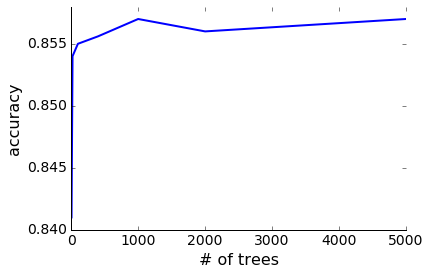

In [61]:
f1 = [0.414, 0.381, 0.388, 0.38, 0.389, 0.387,0.388]
ac = [0.841, 0.854, 0.855, 0.8556, 0.857, 0.856,0.857]
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
plt.plot(trees_list,ac,Linewidth=2)
plt.xlabel("# of trees", fontsize=16)  
plt.ylabel("accuracy", fontsize=16)  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)  
plt.figure(figsize=(12, 9))  
#ax.set_xscale('log')
print(trees_list)

As it is seen with increasing the number of trees first the accuracy increases, the reason is with increasing the number of trees the variance decrease. However the training time increase

Next we change the depth to see the effect of depth of the trees. 

In [55]:
depth_list = list(map(lambda x: int(x),np.logspace(0.8,4,10)))
depth_list = [3,10,20,40,100,500]
ac = []
f1 = []
for depth in depth_list:
    accur_temp = 0
    f1_scor_temp = 0
    accuracy,f1_sc, conf_matrix = train_forest(depth,50,features)
    ac.append(accuracy)
    f1.append(f1_sc)

[0.85412787849093574, 0.85733300669606405, 0.85349501878164291, 0.85478115302956059, 0.85797811530295609, 0.85414012738853506]


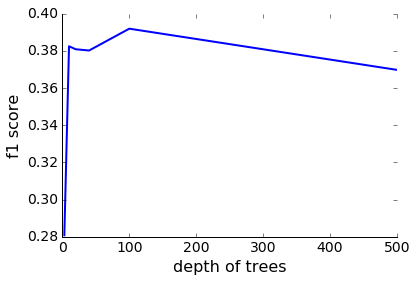

In [59]:
plt.plot(depth_list,f1,Linewidth=2)
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
plt.xlabel("depth of trees", fontsize=16)  
plt.ylabel("f1 score", fontsize=16)  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)  
meaningfull_cols
print(ac)


We can see the expected pattern in the figure, for small depth there is high bias and for very large depth there is hih variance. Also note that after some point increasing the depth does not change anything, the reason might be that the depth is enough to classify the data and increasing the depth does not change anything.

### Important features

As we are asked to show the most important features, we use the `feature_importances_` to find the importance of each feature.

In [62]:
importances = forest.feature_importances_

Using the code available [here](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html), we can plot the importance of each feature along with different trees in forest!

In [63]:
x_train, x_test, y_train, y_test = train_test_split(
        features.values, binary_targets, test_size=0.25, stratify=binary_targets)
forest_c = RandomForestClassifier(n_estimators=256,max_depth=20, n_jobs=-1, oob_score=True)
forest_c.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=256, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

Feature ranking: score
1. seIAT (feature 16) : 0.104251
2. seExp (feature 19) : 0.084175
3. meanExp (feature 17) : 0.080046
4. meanIAT (feature 14) : 0.078264
5. nIAT (feature 15) : 0.061905
6. nExp (feature 18) : 0.060537
7. goals (feature 9) : 0.049773
8. victories (feature 6) : 0.047053
9. defeats (feature 8) : 0.046845
10. games (feature 5) : 0.045635
11. yellowCards (feature 10) : 0.044688
12. ties (feature 7) : 0.040546
13. weight (feature 2) : 0.039276
14. leagueCountry (feature 0) : 0.037462
15. height (feature 1) : 0.035298
16. birthyear (feature 3) : 0.033650
17. allreds (feature 13) : 0.029711
18. position (feature 4) : 0.028949
19. redCards (feature 12) : 0.027420
20. yellowReds (feature 11) : 0.024516


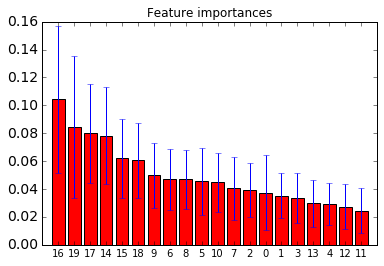

In [64]:
importances = forest_c.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_c.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking: score")

for f in range(len(indices)):
    print("%d. %s (feature %d) : %f" % (f + 1, meaningfull_cols[indices[f]],
                                        indices[f],
                                        importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(meaningfull_cols)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(len(meaningfull_cols)), indices)
plt.yticks(fontsize=14)
plt.xlim([-1, len(meaningfull_cols)])
plt.figure(figsize=(12, 9)) 
plt.show()

Unfortuantely, the race scores get the first four positions.

## 4- Learning Curves (Bonus)

In [66]:
from sklearn.model_selection import learning_curve

There is acode for plotting the learning curve [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py) but in order to understand the code better we decide to implement it ourselves
and accuracy to measure the classifiers performance with stratified data split.

In [111]:
def plotLearningCurves2():
    f1_mean_train = []
    f1_std_train = []
    f1_mean_test = []
    f1_std_test = []
    train_sizes=np.linspace(0.1,0.8,5)
    for p in train_sizes:
        f1_score_train = []
        f1_score_test = []
        for num in range(5):
            x_train, x_test, y_train, y_test = train_test_split(
                features.values, binary_targets, test_size=1-p, stratify=binary_targets)

            forest_c = RandomForestClassifier(n_estimators=10,max_depth=20, n_jobs=-1)
            forest_c.fit(x_train,y_train)
            f1_score_train.append(accuracy_score(y_train, forest_c.predict(x_train)))
            f1_score_test.append(accuracy_score(y_test, forest_c.predict(x_test)))
            
        f1_mean_train.append(np.mean(f1_score_train))
        f1_mean_test.append(np.mean(f1_score_test))
        f1_std_train.append(np.std(f1_score_train))
        f1_std_test.append(np.std(f1_score_test))
    f1_mean_train = np.asarray(f1_mean_train)
    f1_mean_test = np.asarray(f1_mean_test)
    f1_std_train = np.asarray(f1_std_train)
    f1_std_test = np.asarray(f1_std_test)
    
    plt.figure()
    plt.title("Learning Curves",fontsize=14)
    plt.legend(loc="best")
    plt.xlabel("Training samples",fontsize=14)
    plt.ylabel("Error Rate",fontsize=14)
    plt.ylim((0.8, 1.01))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid()

    # Plot the average training and test score lines at each training set size
    plt.plot(train_sizes, f1_mean_train, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, f1_mean_test, 'o-', color="r", label="Test score")

    # Plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, f1_mean_train - f1_std_train,
                     f1_mean_train + f1_std_train, alpha=0.1, color="b")
    plt.fill_between(train_sizes, f1_mean_test - f1_std_test,
                     f1_mean_test + f1_std_test, alpha=0.1, color="r")

    # Draw the plot and reset the y-axis
    plt.draw()
    plt.gca().invert_yaxis()

    return plt

computing learning curves for the model...
is done!


/Users/salehi/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


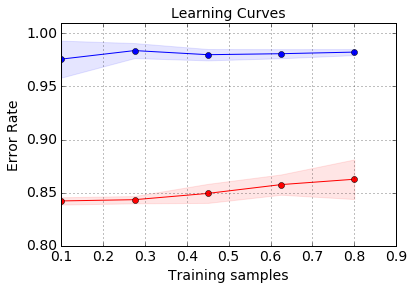

In [112]:
x_train, x_test, y_train, y_test = train_test_split(
        features.values, binary_targets, test_size=0.1, stratify=binary_targets)
forest_c = RandomForestClassifier(n_estimators=256,max_depth=20, n_jobs=-1, oob_score=True)
forest_c.fit(x_train,y_train)
print('computing learning curves for the model...')
#plt1 = plotLearningCurves2(x_train, y_train, forest_c)
plotLearningCurves2()
print('is done!')
# Learning curves for the second model (removing categorical data)
